

---
---

# **MBA EM CIÊNCIA DE DADOS - GESTÃO DE PROJETOS**

<br>

## **EXEMPLO TITANIC**

<br>

---

<br> 

**Orientador: FRANCISCO LOUZADA** 


*Aluno: Milton Miranda Neto*

<br>

---
<br>

Instituto de Ciências Matemáticas e de Computação - USP<br>


---
---


----
----

# **O que veremos hoje?**

----
<br>

Utilizando uma base de dados real, o objetivo desse desafio é mensurar a chance de sobrevivencia dos passageiros do Titanic, de acordo com suas características.

Pipeline do projeto:

1. Entendimento do Negócio (Definição do Problema); 

2. Entendimento dos Dados;

3. Preparação dos Dados;

4. Treinamento (Modelagem);

5. Avaliação;

6. Deployment.



----


----
----

# **Workflow da metodologia CRISP-DS**

----
<br>

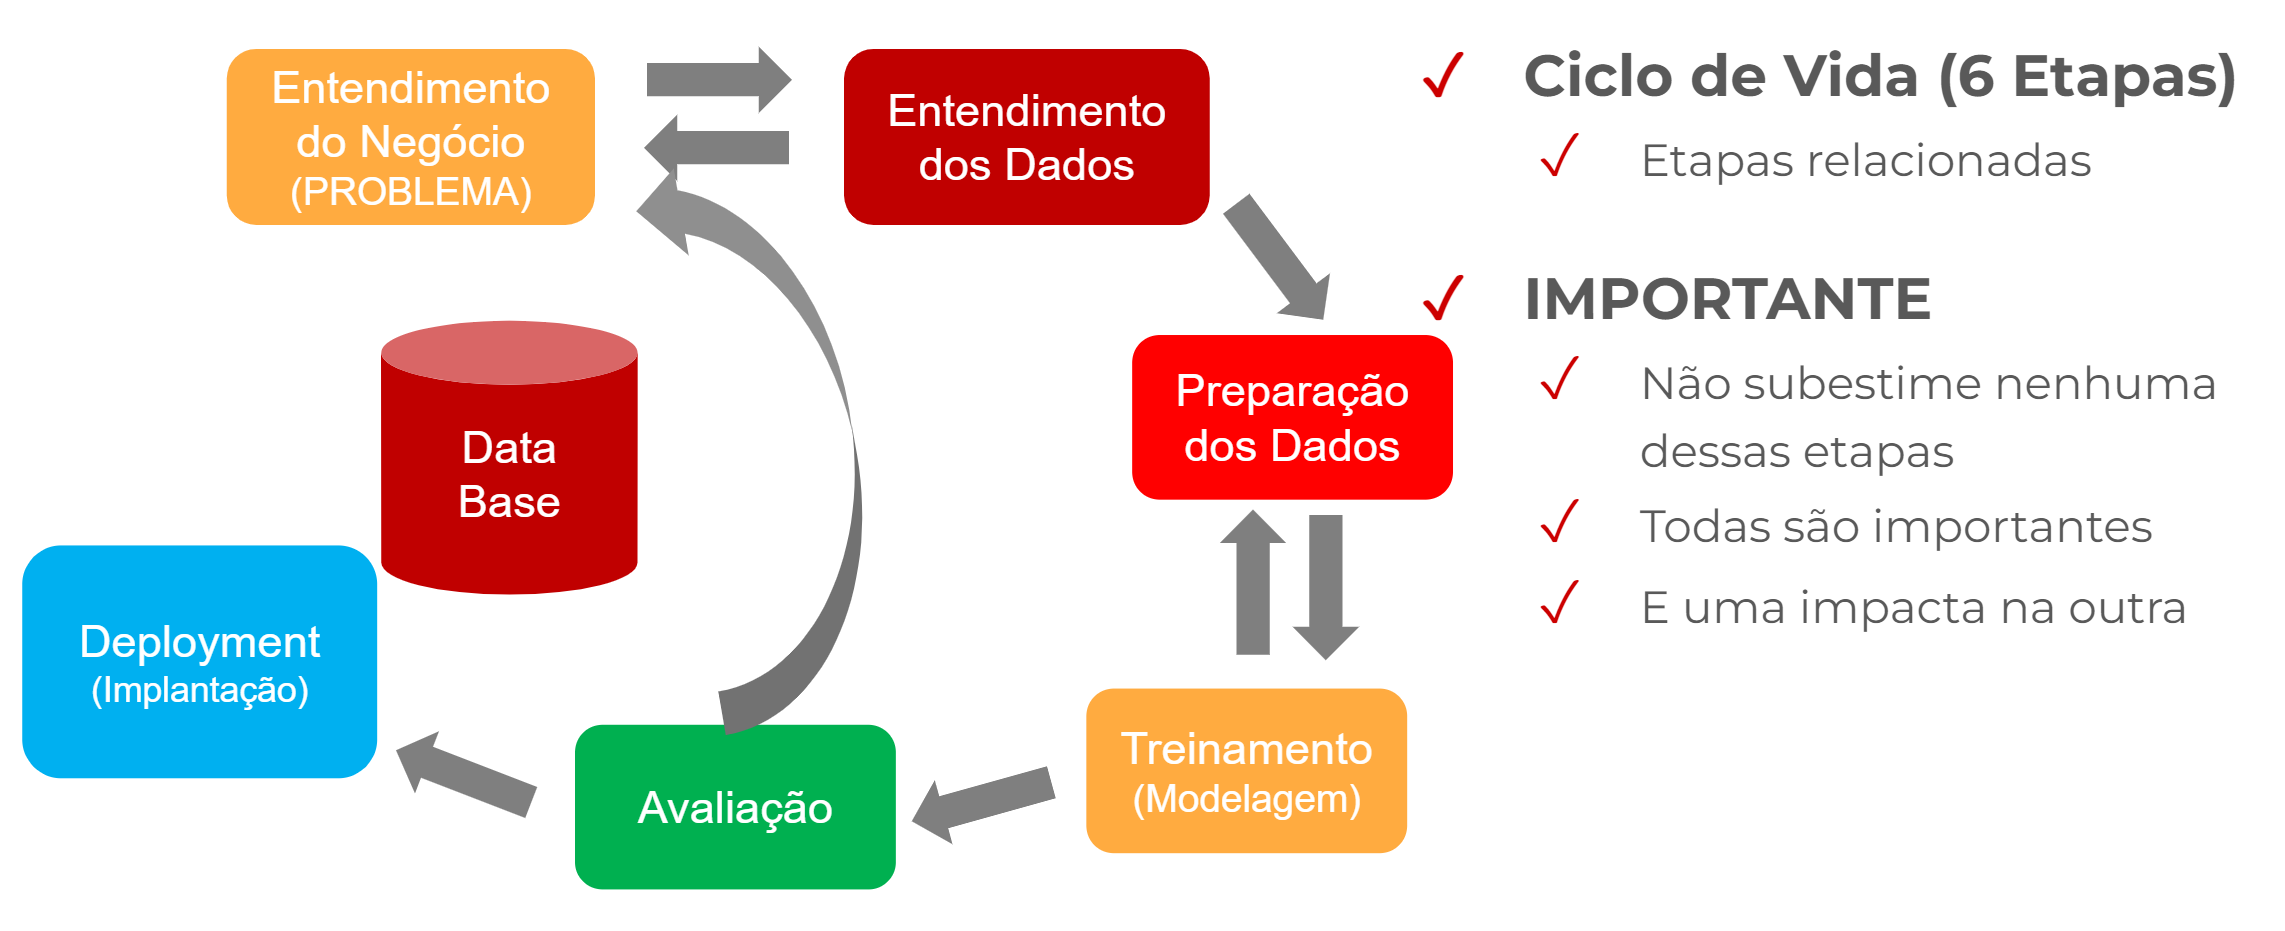

---
---

# **1 - ENTENDIMENTO DO NEGÓCIO (DEFINIÇÃO DO PROBLEMA)**

---
---

## **OBJETIVO: Transformar um problema de negócio em um problema de dados**

---

</br>

## **TAREFAS**

</br>

## 1.1 - Compreender o acidente e suas cauas

## 1.2 - Transformar a sobrevivência no acidente em um problema de classificação

## 1.3 - Formulando perguntas que façam sentido ao problema

## **1.1 - Compreendendo o acidente e suas cauas**

**O navio**

O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff, em Belfast (Irlanda do Norte). Segunda embarcação da Classe Olympic de transatlânticos, depois do RMS Olympic e seguido pelo HMHS Britannic, foi projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews. Sua construção começou em março de 1909 e seu lançamento ao mar ocorreu em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".



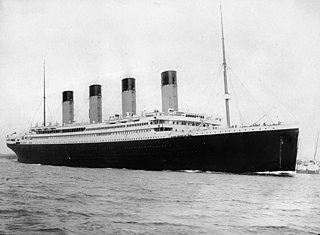

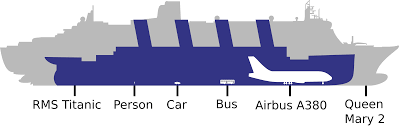

**O naufrágio**

O naufrágio do RMS Titanic é um dos mais infames naufrágios da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou depois de colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Essa tragédia sensacional chocou a comunidade internacional e levou a melhores normas de segurança para os navios.

Uma das razões pelas quais o naufrágio causou tamanha perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas tinham maior probabilidade de sobreviver do que outros, como mulheres, crianças e a classe alta.

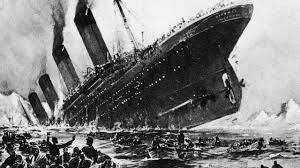

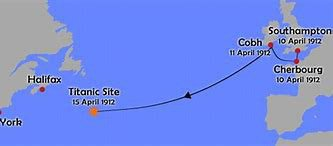

## **1.2 - Entender a chance de sobrevivência como um problema de classificação**

**Definindo o problema**

*Neste desafio, propomos uma análise de quais tipos de pessoas provavelmente sobreviveriam à tragédia do Titanic.*

Em particular, vamos aplicar ferramentas de aprendizado de máquina para prever quais passageiros sobreviveram à tragédia.

## **1.3 - Formulando perguntas que façam sentido ao problema**

Antes de começar a análise, é uma boa prática formular perguntas sobre o problema, para limitar a quantidade de caminhos possíveis na análise, deixando o procedimento mais objetivo. Mais quais serão as perguntas mais relevantes?

*Elas precisam fazer sentido para o problema. Não existe receita de bolo. Por exemplo*:

- Existiam mais pessoas de qual classe?

- Mais pessoas morreram ou sobreviveram?

- Havia mais pessoas de qual sexo?

- A distribuição de idade dos passageiros segue uma curva normal?

- Qual o sexo morreu mais passageiros?

- Qual classe morreu mais passageiros?

- Houve diferença discrepante entre a idade de quem morreu e sobrevivel?

---
---

# **2 - ENTENDIMENTO DOS DADOS**

---

## **OBJETIVO: Coletar e fazer uma análise exploratória dos dados visando encontrar relações entre a variável objetivo (Labels) e as covariáveis (Features)**

---

</br>

## **TAREFAS**

</br>

## 2.1 - Coleta dos dados 

## 2.2 - Dicionário e estrutura do conjunto de dados

## 2.3 - Análise descritiva univariada das variáveis 

## 2.4 - Análise das variáveis por categoria da variável resposta

## 2.5 - Análise de iteração entre as features 




## **2.1 - Coleta dos dados**

<br>

O [Kaggle](https://www.kaggle.com/competitions/titanic/overview) disponibilizou os dados em dois grupos:

- Dataset de treino - `train.csv`

Esse dataset informa se o passageiro sobreviveu ou não e deve ser usado para desenvolver o modelo de Machine Learning.
Possui diversas features, como classe, idade e gênero do passageiro.

- Dataset de Teste - `test.csv`

Esse conjunto de dados não informa se o passageiro sobreviveu ou não e deve ser usado como dados que nunca foram vistos pelo modelo.




## **2.2 - Dicionário e estrutura do conjunto de dados**

Nesse banco de dados, existem 12 variáveis, nas quais são:

- **PassengerId**: Número de identificação do passageiro
- **Survived**: Informa se o passageiro sobreviveu ao desastre
    - 0 = Não
    - 1 = Sim
- **Pclass:** Classe do bilhete
    - 1 = 1ª Classe
    - 2 = 2ª Classe
    - 3 = 3ª Classe
- **Name:** Nome do passageiro
- **Sex:** Sexo do passageiro
- **Age:** Idade do passageiro
- **SibSp:** Quantidade de cônjuges e irmãos a bordo
- **Parch:** Quantidade de pais e filhos a bordo
- **Ticket:** Número da passagem
- **Fare:** Preço da Passagem
- **Cabin:** Número da cabine do passageiro
- **Embarked:** Porto no qual o passageiro embarcou
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

# **Tipos das Variáveis**

- Variáveis Numéricas
    - Discretas
        - Pclass
        - SibSp
        - Parch
- Contínuas
    - Age
    - Fare
- Alvo/Rótulos
    - Survived
- Chave Primária
    - PassengerId
- Variáveis Categóricas
    - Name
    - Sex
    - Ticket
    - Cabin
    - Embarked



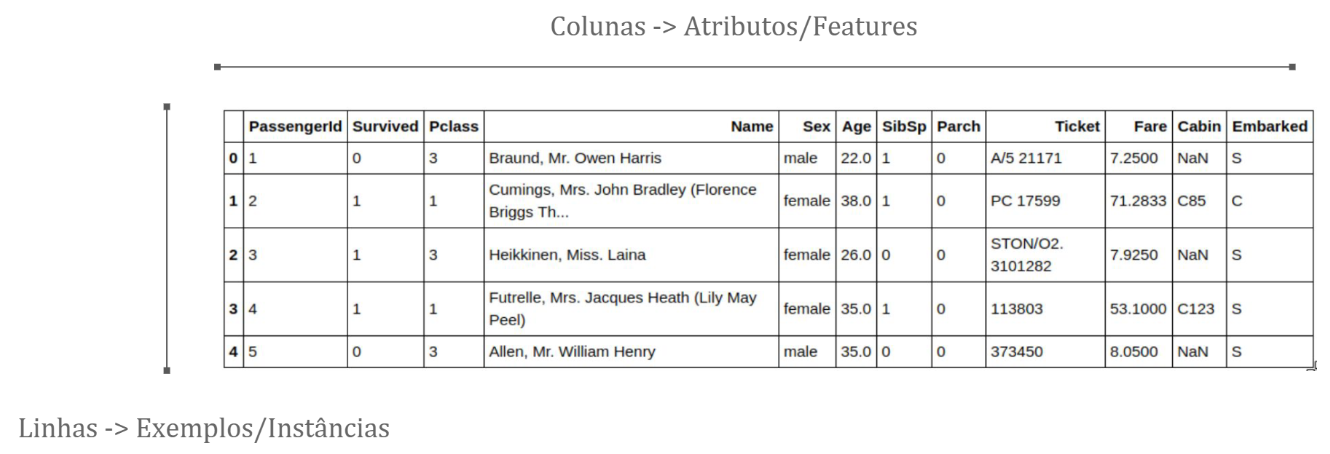

## **2.3 - Análise descritiva univariada das variáveis**

In [ ]:
import pandas as pd              
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lendo o conjunto de dados
dados = pd.read_csv("https://raw.githubusercontent.com/nel-milton/FCD_2021/main/train.csv")


#verificando as dimensões do DataFrame
print(f'CONJUNTO DE DADOS \nVariáveis: \t{dados.shape[1]} \nObservações: \t{dados.shape[0]}\n')

CONJUNTO DE DADOS 
Variáveis: 	12 
Observações: 	891



In [ ]:
#identificando os tipos de cada variável
print(dados.dtypes)

#5 primeiras entradas do conjunto de treino
dados.head()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# porcetagem de valores ausentes

dados.isnull().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [ ]:
dados.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
dados.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
# Renomeando as categorias das variáveis qualitativas

dados['Survived'] = dados['Survived'].map({0: 'Não', 1: 'Sim'})

dados['Sex'] = dados['Sex'].map({'male': 'Masculino',  
                                 'female': 'Feminino'})

dados['Pclass'] = dados['Pclass'].map({1: 'Primeira', 
                                       2: 'Segunda',
                                       3: 'Terceira'})

dados['Embarked'] = dados['Embarked'].map({'C': 'Cherbourg', 
                                           'Q': 'Queenstown',
                                           'S': 'Southampton'})

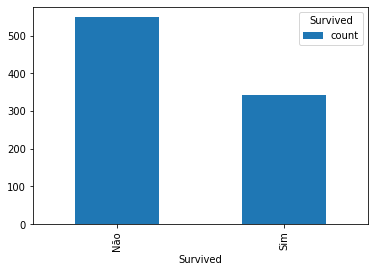

In [ ]:
# ------------------
# Survived
# ------------------


# Tabela de frequências absolutas
tab = pd.crosstab(index=dados['Survived'],
                  columns='count')

# Gráfico de Barras
tab.plot.bar()
plt.legend(title='Survived')

plt.show()

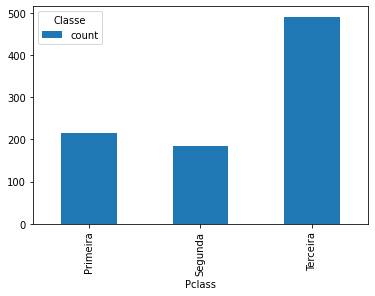

In [ ]:
# ------------------
# Pclass
# ------------------

# Tabela de frequências absolutas
tab = pd.crosstab(index=dados['Pclass'],
                  columns='count')

# Gráfico de Barras
tab.plot.bar()
plt.legend(title='Classe')

plt.show()

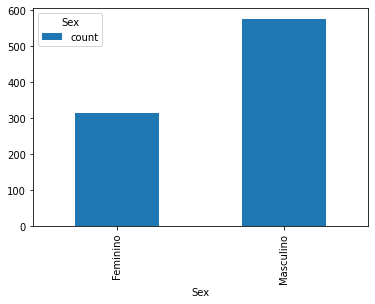

In [ ]:
# ------------------
# Sex
# ------------------


# Tabela de frequências absolutas
tab = pd.crosstab(index=dados['Sex'],
                  columns='count')

# Gráfico de Barras
tab.plot.bar()
plt.legend(title='Sex')

plt.show()

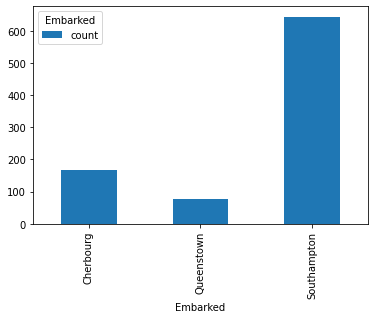

In [ ]:
# ------------------
# Embarked
# ------------------


# Tabela de frequências absolutas
tab = pd.crosstab(index=dados['Embarked'],
                  columns='count')

# Gráfico de Barras
tab.plot.bar()
plt.legend(title='Embarked')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


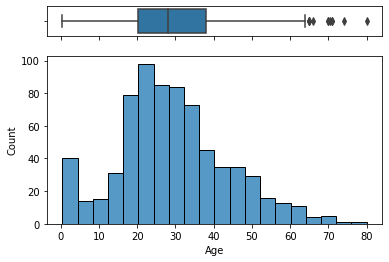

In [ ]:
# ------------------
# Age
# ------------------


# Bibliotecas 
import seaborn as sns
import matplotlib.pyplot as plt
 
# Criando uma figura composta por boxplot e histograma
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Inserindo cada figura em sua posição
sns.boxplot(dados['Age'], ax=ax_box)
sns.histplot(data=dados, x="Age", ax=ax_hist)
 
# Remove os axes do boxplot
ax_box.set(xlabel='')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


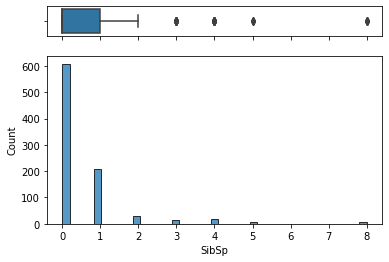

In [ ]:
# ------------------
# SibSp
# ------------------


# Criando uma figura composta por boxplot e histograma
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Inserindo cada figura em sua posição
sns.boxplot(dados['SibSp'], ax=ax_box)
sns.histplot(data=dados, x="SibSp", ax=ax_hist)
 
# Remove os axes do boxplot
ax_box.set(xlabel='')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


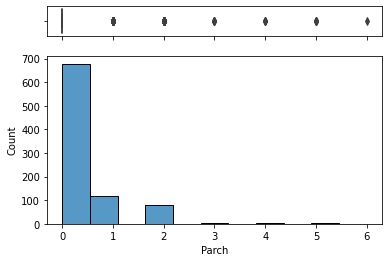

In [ ]:
# ------------------
# Parch
# ------------------

# Criando uma figura composta por boxplot e histograma
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Inserindo cada figura em sua posição
sns.boxplot(dados['Parch'], ax=ax_box)
sns.histplot(data=dados, x="Parch", ax=ax_hist)
 
# Remove os axes do boxplot
ax_box.set(xlabel='')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


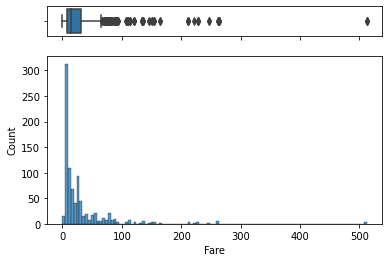

In [ ]:
# ------------------
# Fare
# ------------------

# Criando uma figura composta por boxplot e histograma
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Inserindo cada figura em sua posição
sns.boxplot(dados['Fare'], ax=ax_box)
sns.histplot(data=dados, x="Fare", ax=ax_hist)
 
# Remove os axes do boxplot
ax_box.set(xlabel='')
plt.show()

## **2.4 - Análise das variáveis por categoria da variável resposta**

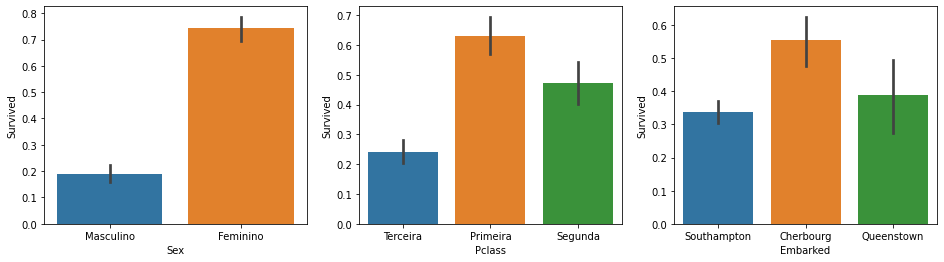

In [ ]:
# ------------------
# Categoricas x Survived 
# ------------------

# Mapeando Survived 
# Não = 0; Sim = 1
dados['Survived'] = dados['Survived'].map({'Não':0, 'Sim':1})

# plotar os gráficos para Survived vs. Sex, Pclass e Embarked

fig, (axis1, axis2, axis3) = plt.subplots (1,3, figsize=(16,4))

sns.barplot(x='Sex', y='Survived', data = dados, ax = axis1)
sns.barplot(x='Pclass', y='Survived', data = dados, ax = axis2)
sns.barplot(x='Embarked', y='Survived', data = dados, ax = axis3)

fig.show()

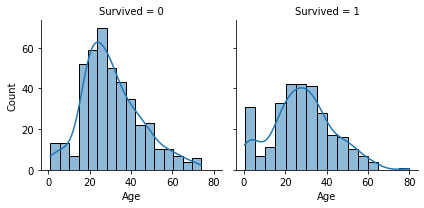

In [ ]:
# ------------------
# Age x Survived
# ------------------
 
age_survived = sns.FacetGrid(dados, col='Survived')
age_survived.map(sns.histplot, 'Age', kde=True)

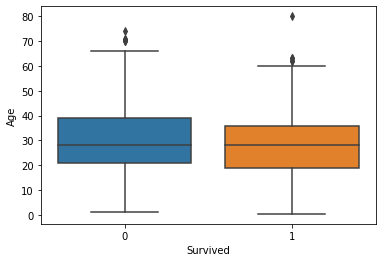

In [ ]:
# Boxplots
sns.boxplot(x=dados['Survived'], y=dados['Age'])

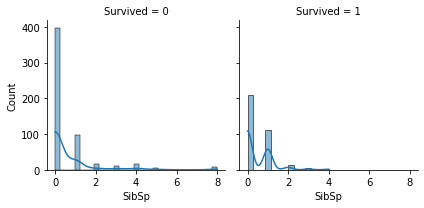

In [ ]:
# ------------------
# SibSp x Survived
# ------------------
 
sibsp_survived = sns.FacetGrid(dados, col='Survived')
sibsp_survived.map(sns.histplot, 'SibSp', kde=True)

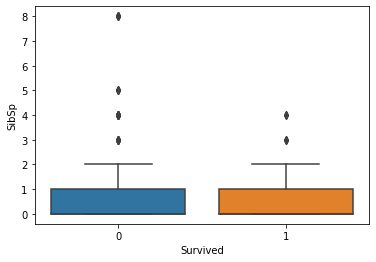

In [ ]:
# Boxplots
sns.boxplot(x=dados['Survived'], y=dados['SibSp'])

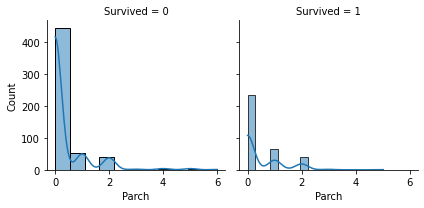

In [ ]:
# ------------------
# Parch x Survived
# ------------------
 
parch_survived = sns.FacetGrid(dados, col='Survived')
parch_survived.map(sns.histplot, 'Parch', kde=True)

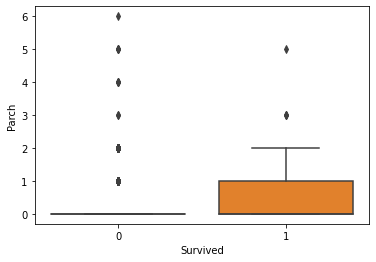

In [ ]:
# Boxplots
sns.boxplot(x=dados['Survived'], y=dados['Parch'])

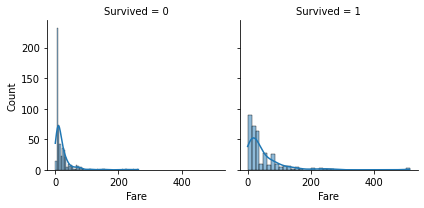

In [ ]:
# ------------------
# Fare x Survived
# ------------------
 
fare_survived = sns.FacetGrid(dados, col='Survived')
fare_survived.map(sns.histplot, 'Fare', kde=True)

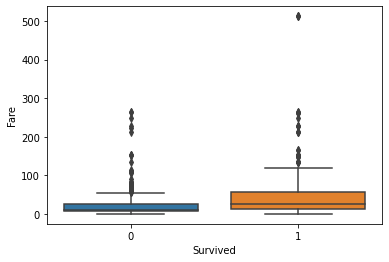

In [ ]:
# Boxplots
sns.boxplot(x=dados['Survived'], y=dados['Fare'])

## **2.5 - Análise de iteração entre as features**

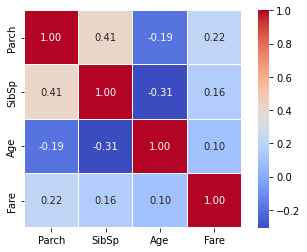

In [ ]:
# Variáveis
quantitativas = ['Parch', 'SibSp', 'Age', 'Fare']

# plotar o heatmap para variáveis numéricas
sns.heatmap(dados[quantitativas].corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


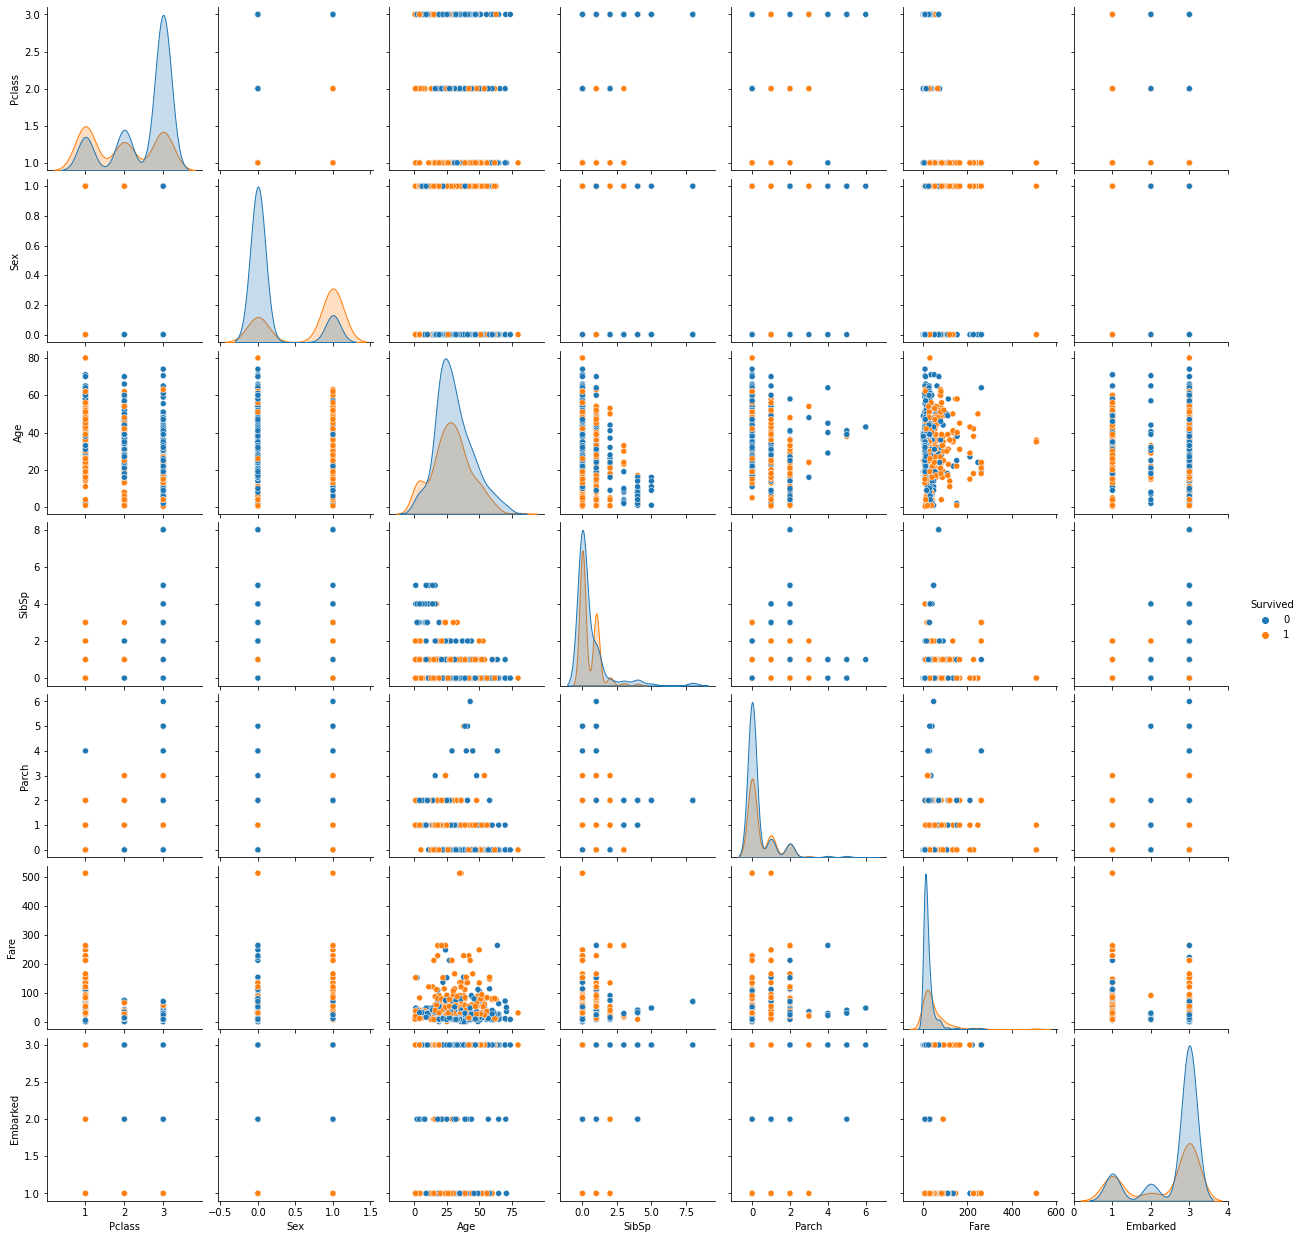

In [ ]:
# Variáveis de interesse
df = dados.copy()
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Codificando as variáveis categoricas para valores numéricos
df['Sex'] = df['Sex'].map({'Masculino':0,  
                           'Feminino':1})

df['Pclass'] = df['Pclass'].map({'Primeira':1, 
                                 'Segunda':2,
                                 'Terceira':3})

df['Embarked'] = df['Embarked'].map({'Cherbourg':1, 
                                     'Queenstown':2,
                                     'Southampton':3})

sns.pairplot(df, 'Survived')

In [ ]:
# ------------------
# Pclass x Sex
# ------------------

# Tabela de dupla entrada

tabela_dupla = pd.crosstab(index=dados['Pclass'], columns=dados['Sex'])

tabela_dupla


Sex,Feminino,Masculino
Pclass,,
Primeira,94,122
Segunda,76,108
Terceira,144,347


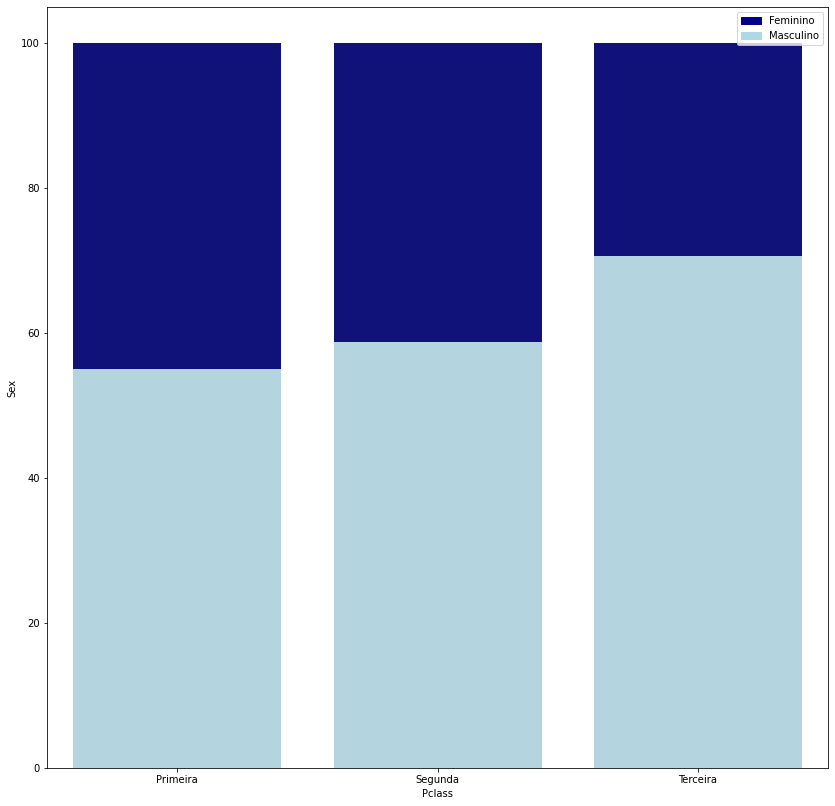

In [ ]:
# ------------------
# Pclass x Sex
# ------------------

# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# valores de percentuais das linhas
total = dados.groupby('Pclass')['Sex'].sum().reset_index()
masculino = dados[dados.Sex=='Masculino'].groupby('Pclass')['Sex'].sum().reset_index()
masculino['Sex'] = [100*122/(94+128), 100*108/(108+76), 100*347/(347+144)]
total['Sex'] = [100.0, 100.0, 100.0]


# tamanho da figura
plt.figure(figsize=(14, 14))

# bar chart 1 -> top bars grupo:Feminino
bar1 = sns.barplot(x="Pclass",  y="Sex", data=total, color='darkblue')

# # bar chart 2 -> bottom bars grupo: Masculino
bar2 = sns.barplot(x="Pclass", y="Sex", data=masculino, color='lightblue')

# Legenda
top_bar = mpatches.Patch(color='darkblue', label='Feminino')
bottom_bar = mpatches.Patch(color='lightblue', label='Masculino')
plt.legend(handles=[top_bar, bottom_bar])

# Mostra a figura
plt.show()

In [ ]:
# ------------------
# Embarked x Sex
# ------------------

# Tabela de dupla entrada

tabela_dupla = pd.crosstab(index=dados['Embarked'], columns=dados['Sex'])

tabela_dupla

Sex,Feminino,Masculino
Embarked,,
Cherbourg,73,95
Queenstown,36,41
Southampton,203,441


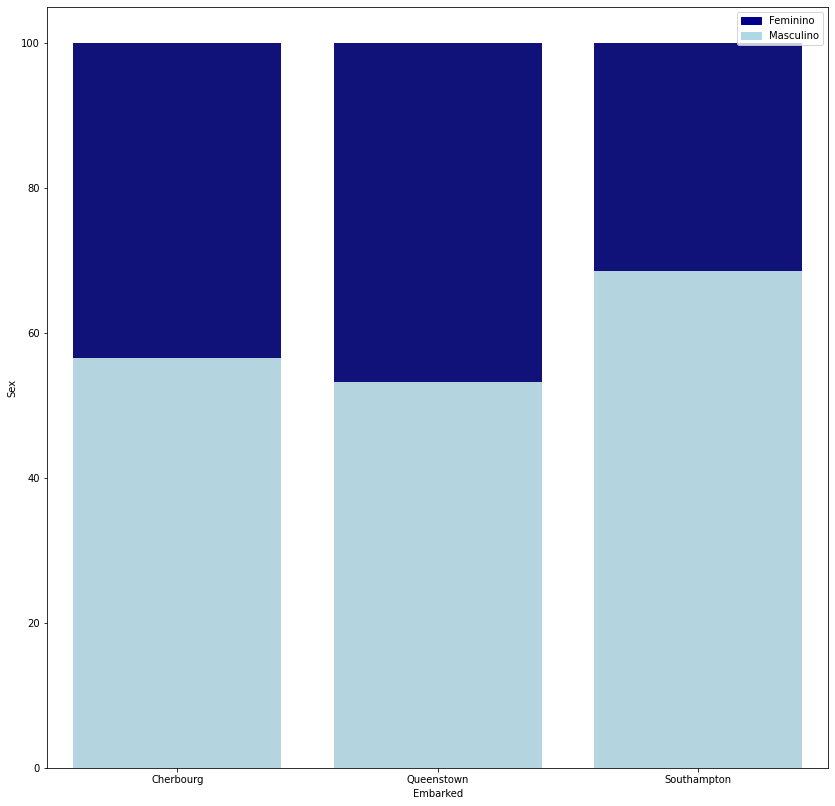

In [ ]:
# ------------------
# Embarked x Sex
# ------------------

# from raw value to percentage
total = dados.groupby('Embarked')['Sex'].sum().reset_index()
masculino = dados[dados.Sex=='Masculino'].groupby('Embarked')['Sex'].sum().reset_index()
masculino['Sex'] = [100*95/(95+73), 100*41/(41+36), 100*441/(441+203)]
total['Sex'] = [100.0, 100.0, 100.0]


# set the figure size
plt.figure(figsize=(14, 14))

# bar chart 1 -> top bars grupo:Feminino
bar1 = sns.barplot(x="Embarked",  y="Sex", data=total, color='darkblue')

# # bar chart 2 -> bottom bars grupo: Masculino
bar2 = sns.barplot(x="Embarked", y="Sex", data=masculino, color='lightblue')

# Legenda
top_bar = mpatches.Patch(color='darkblue', label='Feminino')
bottom_bar = mpatches.Patch(color='lightblue', label='Masculino')
plt.legend(handles=[top_bar, bottom_bar])

# Mostra a figura
plt.show()

In [ ]:
# ------------------
# Embarked x Pclass
# ------------------

# Tabela de dupla entrada

tabela_dupla = pd.crosstab(index=dados['Embarked'], columns=dados['Pclass'])

tabela_dupla

Pclass,Primeira,Segunda,Terceira
Embarked,,,
Cherbourg,85,17,66
Queenstown,2,3,72
Southampton,127,164,353


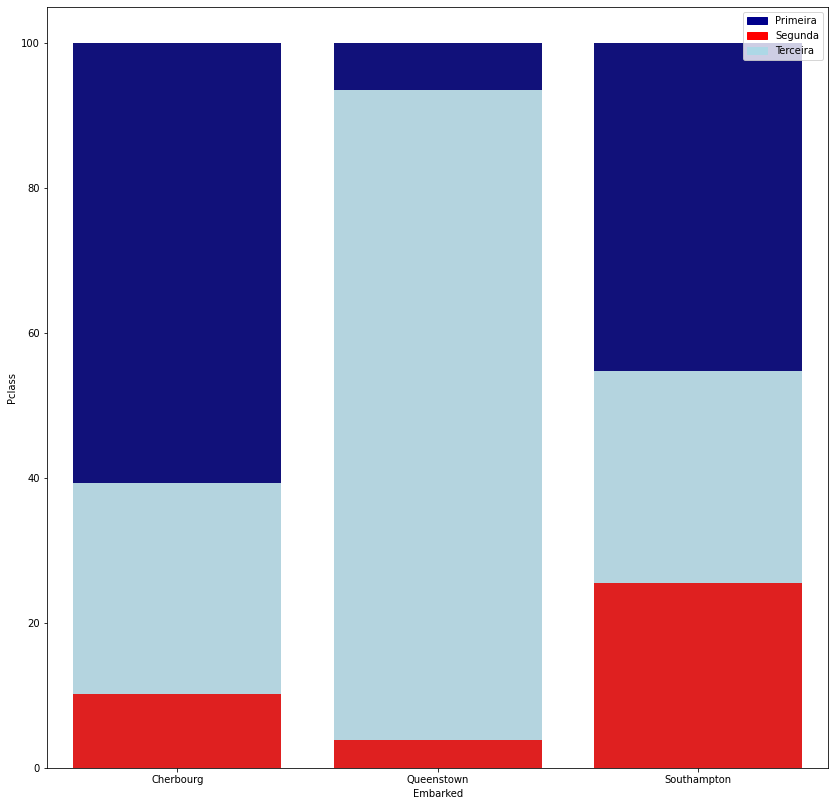

In [ ]:
# ------------------
# Embarked x Pclass
# ------------------


# from raw value to percentage
total = dados.groupby('Embarked')['Pclass'].sum().reset_index()
terceira = dados[dados.Pclass=='Terceira'].groupby('Embarked')['Pclass'].sum().reset_index()
segunda = dados[dados.Pclass=='Segunda'].groupby('Embarked')['Pclass'].sum().reset_index()

terceira['Pclass'] = [100*66/(66+17+85), 100*72/(72+3+2), 100*353/(353+164+127)]
segunda['Pclass'] = [100*(17)/(66+17+85), 100*(3)/(72+3+2), 100*(164)/(353+164+127)]
total['Pclass'] = [100.0, 100.0, 100.0]


# set the figure size
plt.figure(figsize=(14, 14))

# bar chart 1 -> top bars grupo:Feminino
bar1 = sns.barplot(x="Embarked",  y="Pclass", data=total, color='darkblue')

# # bar chart 2 -> bottom bars grupo: Masculino
bar2 = sns.barplot(x="Embarked", y="Pclass", data=terceira, color='lightblue')

# # bar chart 2 -> bottom bars grupo: Masculino
bar3 = sns.barplot(x="Embarked", y="Pclass", data=segunda, color='red')

# Legenda
top_bar = mpatches.Patch(color='darkblue', label='Primeira')
middle_bar = mpatches.Patch(color='red', label='Segunda')
bottom_bar = mpatches.Patch(color='lightblue', label='Terceira')
plt.legend(handles=[top_bar, middle_bar, bottom_bar])

# Mostra a figura
plt.show()

# **Respostas das perguntas**

* Terceira classe.
* A maioria dos passageiros morreram.
* Haviam mais homens.
* Morreu mais homens.
* Houve mais mortes na terceira classe.
* Não houve discrepância entre as idades de quem morreu e sobrevivel.

---
---

# **3 - PREPARAÇÃO DOS DADOS**

---

## **OBJETIVO: Preparar o conjunto de dados para aplicação dos modelos de aprendizado de máquina**

---

</br>

## **TAREFAS**

</br>

## 3.1 - Tratamento de valores ausentes: remoção/substituição dos valores ausentes no conjunto de dados 

## 3.2 - Transformação de variáveis: criar novas features, aplicar one-hot encoding as variáveis categóricas.



## **3.1 - Tratamento de valores ausentes: remoção/substituição dos valores ausentes no conjunto de dados**

In [ ]:
# Removendo variáveis 
dados.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# verificar os dados ausentes
dados.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
# age
age_median = dados['Age'].median()
dados['Age'].fillna(age_median, inplace=True)

# embarked
embarked_top = dados['Embarked'].value_counts().index[0]
dados['Embarked'].fillna(embarked_top, inplace=True)

# verificar os dados ausentes
dados.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## **3.2 - Transformação de variáveis: criar novas features, aplicar one-hot encoding as variáveis categóricas.**



In [ ]:
# converter Sex em 0 e 1
dados['Sex'] = dados['Sex'].map({'Masculino': 0, 'Feminino': 1})
dados.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,Terceira,0,22.0,1,0,7.2500,Southampton
1,1,Primeira,1,38.0,1,0,71.2833,Cherbourg
2,1,Terceira,1,26.0,0,0,7.9250,Southampton
3,1,Primeira,1,35.0,1,0,53.1000,Southampton
4,0,Terceira,0,35.0,0,0,8.0500,Southampton


In [ ]:
# Aplicar o one-hot encoding é bem simples
dados = pd.get_dummies(dados)
dados.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_Primeira,Pclass_Segunda,Pclass_Terceira,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,0,35.0,0,0,8.0500,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(dados)
dados = pd.DataFrame(scaler.transform(dados), columns=dados.columns)

dados.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_Primeira,Pclass_Segunda,Pclass_Terceira,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0.0,0.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,1.0,0.434531,0.125,0.0,0.103644,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0


---
---

# **4 - TREINAMENTO (MODELAGEM)**

---

## **OBJETIVO: Encontrar o modelo com melhor performance (acurácia)**

---

</br>

## **TAREFAS**

</br>

## 4.1 - Treinar e comparar diferentes metodologias

- k-NN

- Decision Tree

- Naive Bayes

- regressão Logística

- SVM

- Random Forest

## **4.1 - Treinar e comparar diferentes metodologias**


In [ ]:
# Vamos colocar em variavel quais são nossas features e qual é o target
target = 'Survived'
features = list(dados.columns)
features.remove(target)

print('Features:', features)
print('Target:', target)

Features: ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_Primeira', 'Pclass_Segunda', 'Pclass_Terceira', 'Embarked_Cherbourg', 'Embarked_Queenstown', 'Embarked_Southampton']
Target: Survived


In [ ]:
from sklearn.model_selection import train_test_split

# Data-split: 80% treino - 20% validação

X = dados[features] # matrizes - Matriz de features
y = dados[target]   # vetores  - vetor de caracteristicas

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.2, 
                                                  random_state=42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(712, 11)
(179, 11)
(712,)
(179,)


**k-Nearest Neighbors (k-NN)**

In [ ]:
# Importando nosso classificador
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Criando lista com todos os números de vizinhos que queremos testar
n_vizinhos = np.arange(1, 11) # Array de 1 a 10

# Criando uma lista para guardarmos os resultados
resultados = []

# Para cada numero de vizinhos
for k in n_vizinhos:
    # Criamos um modelo novo e treinamos ele
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    # Fazendo predição para os dados de validação e calculando acurácia
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    # Salvando a acurácia para o numero atual de vizinhos
    resultados.append(acc)

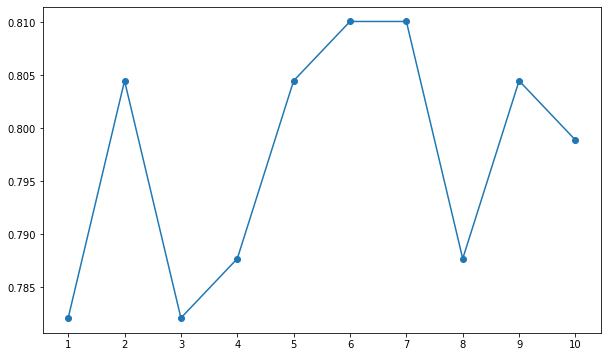

In [ ]:
plt.figure(figsize=(10,6))
# No eixo x teremos o número de vizinhos e no eixo y a acurácia
plt.plot(n_vizinhos, resultados, '-o')
# Definindo que no eixo x queremos exibir cada numero de vizinhos
plt.xticks(n_vizinhos);

In [ ]:
# Melhor K=6

# cria um modelo kNN com melhor K
clf_KNN = KNeighborsClassifier(n_neighbors=6)

# treinamento do modelo
clf_KNN.fit(X_train,y_train)

# predição
y_pred = clf_KNN.predict(X_val)

# acurácia
acc_KNN = accuracy_score(y_val,y_pred)

print('accuracy_score:{:.2f}%'.format(acc_KNN*100))

accuracy_score:81.01%


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Classificador

# cria uma decision tree
clf_tree = DecisionTreeClassifier()

# treinamento do modelo
clf_tree.fit(X_train,y_train)

# predição
y_pred = clf_tree.predict(X_val)

# acurácia
acc_DT = accuracy_score(y_val,y_pred)

print('accuracy_score:{:.2f}%'.format(acc_DT*100))

accuracy_score:77.65%


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Cria um NB-gaussiano
clf_NB = GaussianNB()

# treinamento
clf_NB.fit(X_train,y_train)

# predição
y_pred = clf_NB.predict(X_val)

# acurácia
acc_NB = accuracy_score(y_val,y_pred)

print('accuracy_score:{:.2f}%'.format(acc_NB*100))

accuracy_score:77.65%


**Regressão Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Cria uma regressão logistica
clf_LR = LogisticRegression(max_iter=500)

# treinamento
clf_LR.fit(X_train,y_train)

# predição
y_pred = clf_LR.predict(X_val)

# acurácia
acc_LR=accuracy_score(y_val,y_pred)

print('accuracy_score:{:.2f}%'.format(acc_LR*100))

accuracy_score:79.89%


**SVM**

In [ ]:
from sklearn.svm import SVC

# Cria um modelo SVM
clf_SVC = SVC(max_iter=500)

# Trenamento do modelo
clf_SVC.fit(X_train,y_train)

# predição
y_pred = clf_SVC.predict(X_val)

# acurácia
acc_SVC = accuracy_score(y_val,y_pred)

print('accuracy_score:{:.2f}%'.format(acc_SVC*100))

accuracy_score:79.33%


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Cria um modelo RF
clf_RF = RandomForestClassifier()

# Treina o modelo
clf_RF.fit(X_train,y_train)

# predição
y_pred = clf_RF.predict(X_val)

# acurácia
acc_RF=accuracy_score(y_val,y_pred)

print('accuracy_score:{:.2f}%'.format(acc_RF*100))

accuracy_score:80.45%


**Comparando os modelos**

In [ ]:
compare = pd.DataFrame({'Model': ['kNN', 'Decision Tree', 'Naive bayes','Logistic Regression','SVM','Random Forest'], 
                        'Accuracy': [acc_KNN*100,acc_DT*100,acc_NB*100,acc_LR*100,acc_SVC*100,acc_RF*100]})
compare

,Model,Accuracy
0,kNN,81.005587
1,Decision Tree,77.653631
2,Naive bayes,77.653631
3,Logistic Regression,79.888268
4,SVM,79.329609
5,Random Forest,80.446927


---
---

# **5 - AVALIAÇÃO**

---

## **OBJETIVO: Avaliar a performance do modelo realizando um estudo de sua predição e compara-lo a um classificador dummy**

---

</br>

## **TAREFAS**

</br>

## 5.1 - Avaliar outras medidas: Precision, Recall, F1-Score, AUC-ROC

## 5.2 - Relatório de classificação do modelo 

## 5.3 - Ajustar um classificador dummy

## 5.4 - Comparar o ganho de performance do modelo proposto com relação ao classificador dummy


## **5.1 - Avaliar outras medidas: Precision, Recall, F1-Score e AUC-ROC**

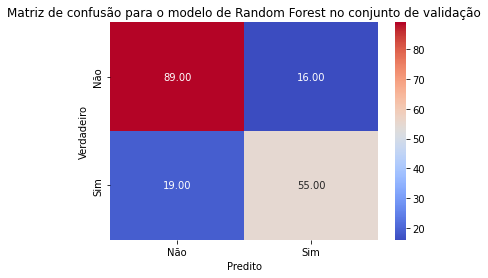

In [ ]:
# Confusion matrix no conjunto de validação
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import auc

# Valores preditos
y_pred = clf_RF.predict(X_val)

confu_matrix = confusion_matrix(y_val, y_pred)

sns.heatmap(confu_matrix, annot=True, fmt='.2f', cmap= "coolwarm",
            xticklabels = ['Não', 'Sim'],
            yticklabels = ['Não', 'Sim'])
plt.title('Matriz de confusão para o modelo de Random Forest no conjunto de validação')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()

In [ ]:
y_predito = clf_RF.predict(X_val)


metricas = pd.DataFrame({'Metrica': ['Acurácia', 'Precision', 'Recall','f1-Score'], 
                        'Valor_RF': [accuracy_score(y_val, y_predito)*100,
                                  precision_score(y_val, y_predito)*100,
                                  recall_score(y_val, y_predito)*100,
                                  f1_score(y_val, y_predito)*100]})
metricas

,Metrica,Valor_RF
0,Acurácia,80.446927
1,Precision,77.464789
2,Recall,74.324324
3,f1-Score,75.862069


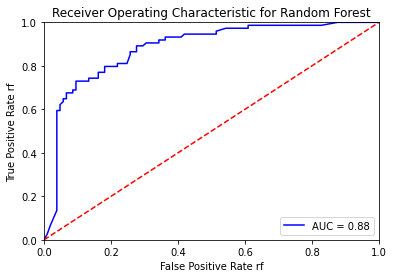

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

prob_rf = clf_RF.predict_proba(X_val)
preds_rf = prob_rf[:, 1]

fprrf, tprrf, thresholdrf = roc_curve(y_val, preds_rf)
roc_aucrf = auc(fprrf, tprrf)

plt.title('Receiver Operating Characteristic for Random Forest')
plt.plot(fprrf, tprrf, 'b', label = 'AUC = %0.2f' % roc_aucrf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate rf')
plt.xlabel('False Positive Rate rf')
plt.show()

## **5.2 - Relatório de classificação do modelo**

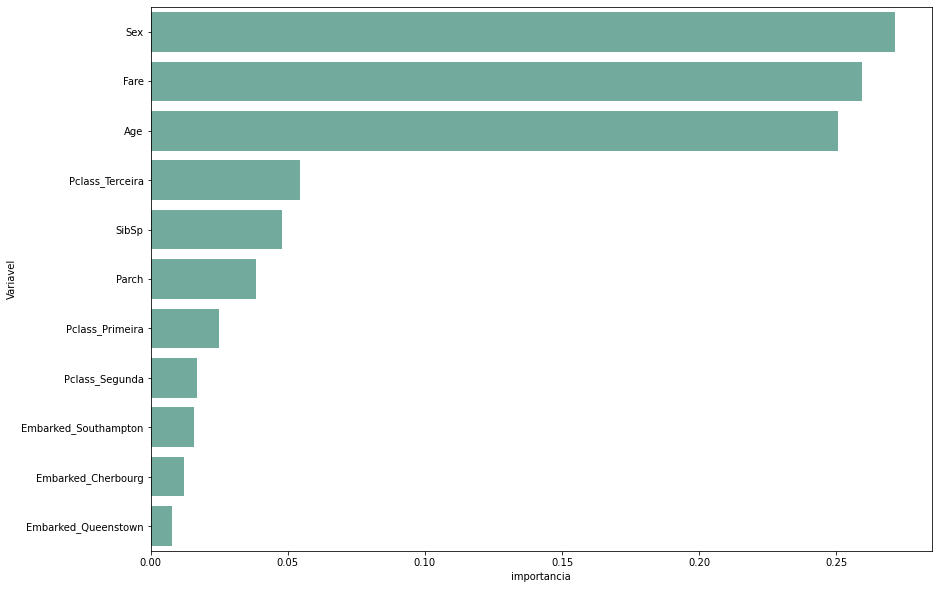

In [ ]:
df = pd.DataFrame({'Variavel': features,
                   'importancia':clf_RF.feature_importances_})


# Tamanho da figura
plt.figure(figsize=(14, 10))

# Reordenando os valores
df = df.sort_values(['importancia'], ascending=False).reset_index(drop=True)

# Gráfico de barras
sns.barplot(
    x="importancia", 
    y="Variavel", 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

In [ ]:
pip install scikit-plot

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


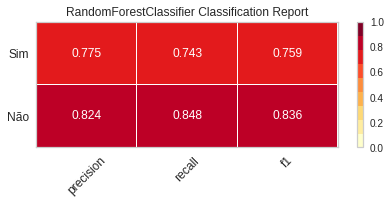

In [ ]:
# ------
# Relatório de Classificação
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassificationReport

mapping = {0: 'Não', 1: 'Sim'}

fig, ax = plt.subplots(figsize = (6, 3))

cm_viz = ClassificationReport(
    clf_RF,
    classes = ['Não', 'Sim'],
    label_encoder = mapping
)

cm_viz.score(X_val, y_val)
cm_viz.poof()
fig.savefig('RelatorioClassificao.png', dpi = 300)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.7918021357289916


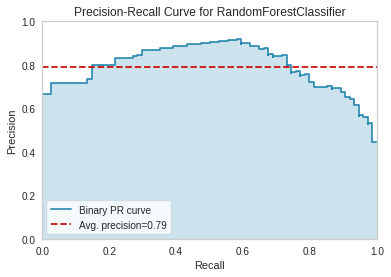

In [ ]:
# ------
# Curva de precisão-recall

from yellowbrick.classifier import PrecisionRecallCurve

fig, ax = plt.subplots(figsize = (6, 4))

viz = PrecisionRecallCurve(
    clf_RF
)

viz.fit(X_train, y_train)
print(viz.score(X_val, y_val))
viz.poof()
fig.savefig('CurvaPrecisaoRecall.png', dpi = 300)

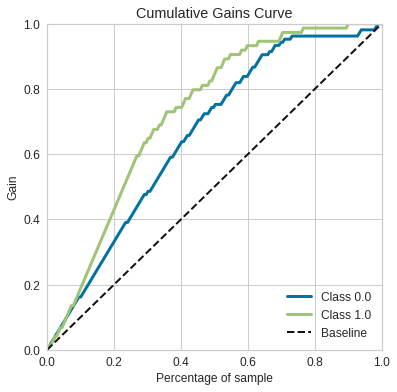

In [ ]:
# ------
# Gráfico de ganhos cumulativos

import scikitplot as skplt

fig, ax = plt.subplots(figsize = (6, 6))
y_probs = clf_RF.predict_proba(X_val)
skplt.metrics.plot_cumulative_gain(
    y_val, y_probs, ax = ax
)

fig.savefig(
    'GanhoCumulativo.png',
    dpi = 300,
    bbox_inches = 'tight',
)

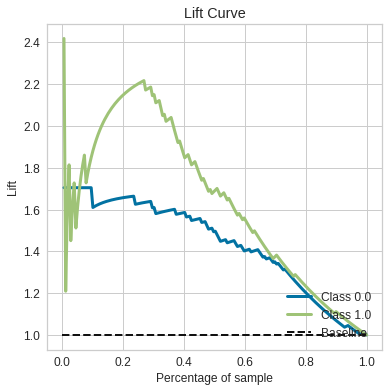

In [ ]:
# ------
# Gráfico de elevação

fig, ax = plt.subplots(figsize = (6, 6))
y_probs = clf_RF.predict_proba(X_val)
skplt.metrics.plot_lift_curve(
    y_val, y_probs, ax = ax
)

fig.savefig(
     'Elevacao.png',
     dpi = 300,
     bbox_inches = 'tight',
)

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


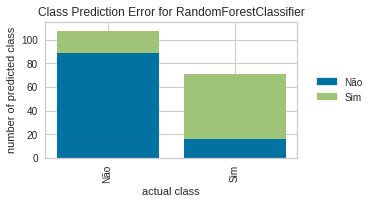

In [ ]:
# ------
# Erro de predição de classe

from yellowbrick.classifier import ClassPredictionError

fig, ax = plt.subplots(figsize = (6, 3))
cpe_viz = ClassPredictionError(
    clf_RF,
    classes = ['Não', 'Sim']
)

cpe_viz.score(X_val, y_val)
cpe_viz.poof()
fig.savefig('predicaoClasse.png', dpi = 300)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


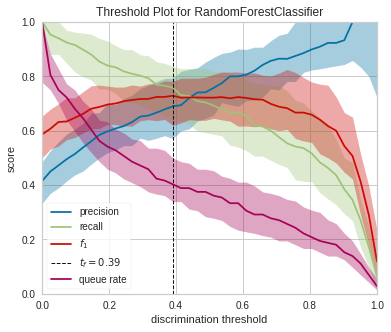

In [ ]:
# ------
# Limiar de discriminação

from yellowbrick.classifier import DiscriminationThreshold

fig, ax = plt.subplots(figsize = (6, 5))

dt_viz = DiscriminationThreshold(clf_RF)
dt_viz.fit(X_train, y_train)
dt_viz.poof()
fig.savefig('LimiarDiscriminacao.png', dpi = 300)

## **5.3 - Ajustar um classificador dummy**

In [ ]:
from sklearn.dummy import DummyClassifier

# Classificador aleatório 
# Leva em consideração a distribuição empirica de y

clf_dummy = DummyClassifier(strategy="stratified")

# treina o modelo
clf_dummy.fit(X_train, y_train)

# predição
y_pred = clf_dummy.predict(X_val)


# acurácia
acc_dummy = accuracy_score(y_val,y_pred)

print('accuracy_score:{:.2f}%'.format(acc_dummy*100))

accuracy_score:46.93%


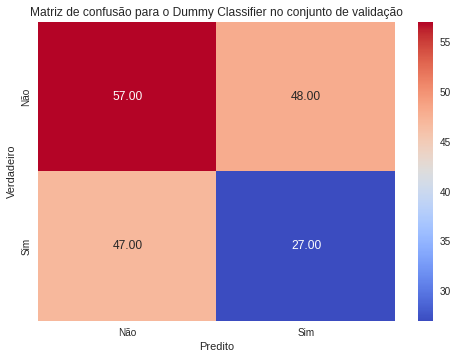

In [ ]:
# Confusion matrix no conjunto de teste

confu_matrix = confusion_matrix(y_val, y_pred)

sns.heatmap(confu_matrix, annot=True, fmt='.2f', cmap= "coolwarm",
            xticklabels = ['Não', 'Sim'],
            yticklabels = ['Não', 'Sim'])
plt.title('Matriz de confusão para o Dummy Classifier no conjunto de validação')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()

In [ ]:
metricas2 = pd.DataFrame({'Metrica': ['Acurácia', 'Precision', 'Recall','f1-Score'], 
                        'Valor_dummy': [accuracy_score(y_val, y_pred)*100,
                                  precision_score(y_val, y_pred)*100,
                                  recall_score(y_val, y_pred)*100,
                                  f1_score(y_val, y_pred)*100]})
metricas2

,Metrica,Valor_dummy
0,Acurácia,46.927374
1,Precision,36.000000
2,Recall,36.486486
3,f1-Score,36.241611


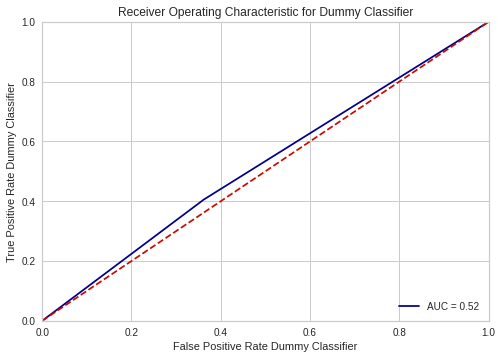

In [ ]:
prob_dummy = clf_dummy.predict_proba(X_val)
preds_dummy = prob_dummy[:, 1]

fprdummy, tprdummy, thresholddummy = roc_curve(y_val, preds_dummy)
roc_aucdummy = auc(fprdummy, tprdummy)

plt.title('Receiver Operating Characteristic for Dummy Classifier')
plt.plot(fprdummy, tprdummy, 'b', label = 'AUC = %0.2f' % roc_aucdummy, color = 'darkblue')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate Dummy Classifier')
plt.xlabel('False Positive Rate Dummy Classifier')
plt.show()

## **5.4 - Comparar o ganho de performance do modelo proposto com relação ao classificador dummy**

In [ ]:
comparacao = pd.DataFrame({'Metrica': ['Acurácia', 'Precision', 'Recall','f1-Score'], 
                           'Valor_dummy': [accuracy_score(y_val, y_pred)*100,
                                  precision_score(y_val, y_pred)*100,
                                  recall_score(y_val, y_pred)*100,
                                  f1_score(y_val, y_pred)*100],
                           'Valor_RF': [accuracy_score(y_val, y_predito)*100,
                                  precision_score(y_val, y_predito)*100,
                                  recall_score(y_val, y_predito)*100,
                                  f1_score(y_val, y_predito)*100]})
comparacao # RF wins!

,Metrica,Valor_dummy,Valor_RF
0,Acurácia,46.927374,80.446927
1,Precision,36.000000,77.464789
2,Recall,36.486486,74.324324
3,f1-Score,36.241611,75.862069


---
---

# **6 - DEPLOYMENT**

---

In [ ]:
# Lendo o conjunto de dados
dados_teste = pd.read_csv("https://raw.githubusercontent.com/nel-milton/FCD_2021/main/test.csv")


#verificando as dimensões do DataFrame
print(f'CONJUNTO DE DADOS \nVariáveis: \t{dados_teste.shape[1]} \nObservações: \t{dados_teste.shape[0]}\n')

CONJUNTO DE DADOS 
Variáveis: 	11 
Observações: 	418



In [ ]:
dados_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Renomeando as categorias das variáveis qualitativas

dados_teste['Sex'] = dados_teste['Sex'].map({'male': 0,  
                                             'female': 1})

dados_teste['Pclass'] = dados_teste['Pclass'].map({1: 'Primeira', 
                                                   2: 'Segunda',
                                                   3: 'Terceira'})

dados_teste['Embarked'] = dados_teste['Embarked'].map({'C': 'Cherbourg', 
                                                       'Q': 'Queenstown',
                                                       'S': 'Southampton'})

In [ ]:
# Copiando id para submissão ao kaggle
passengerId = dados_teste['PassengerId'].copy()

# Removendo variáveis 
dados_teste.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# verificar os dados ausentes
dados_teste.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [ ]:
# age
age_median = dados_teste['Age'].median()
dados_teste['Age'].fillna(age_median, inplace=True)

# fare
fare_median = dados_teste['Fare'].median()
dados_teste['Fare'].fillna(fare_median, inplace=True)

# verificar os dados ausentes
dados_teste.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
# Aplicar o one-hot encoding é bem simples
X_teste = pd.get_dummies(dados_teste)
X_teste.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_Primeira,Pclass_Segunda,Pclass_Terceira,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0,34.5,0,0,7.8292,0,0,1,0,1,0
1,1,47.0,1,0,7.0000,0,0,1,0,0,1
2,0,62.0,0,0,9.6875,0,1,0,0,1,0
3,0,27.0,0,0,8.6625,0,0,1,0,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_teste)
X_teste = pd.DataFrame(scaler.transform(X_teste), columns=X_teste.columns)

X_teste.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_Primeira,Pclass_Segunda,Pclass_Terceira,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0.0,0.452723,0.000,0.000000,0.015282,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.617566,0.125,0.000000,0.013663,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.815377,0.000,0.000000,0.018909,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.353818,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.287881,0.125,0.111111,0.023984,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
y_predito = clf_RF.predict(X_teste)

submission = pd.DataFrame({
        "PassengerId": passengerId,
        "Survived": y_predito
    })

#gerar arquivo csv
submission.to_csv('submission.csv', index=False)

# **Salvando e reutilizando o modelo**

In [ ]:
# Train model, save to file using pickle, load and make predictions
from numpy import loadtxt
import pickle

# save model to file
pickle.dump(clf_RF, open("modelo.pickle.dat", "wb"))

In [ ]:
# some time later...
 
# load model from file
loaded_model = pickle.load(open("pima.pickle.dat", "rb"))
# make predictions for test data
y_pred = loaded_model.predict(X_teste)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_teste, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
